In [ ]:
#Loan Defaulter 

In [18]:
pip install mlxtend

     |████████████████████████████████| 1.3 MB 22 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics,neighbors,tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow import keras
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.utils import resample
import imblearn
from imblearn.over_sampling import RandomOverSampler
import pickle
from tensorflow.keras import regularizers
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn import svm,metrics,neighbors,tree
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import class_weight
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from mlxtend.feature_selection import SequentialFeatureSelector
from keras.regularizers import l2
from sklearn.preprocessing import MinMaxScaler
from keras.regularizers import l1
from kerastuner import HyperModel
from kerastuner.tuners import Hyperband
from sklearn.preprocessing import KBinsDiscretizer
from keras.layers import LeakyReLU
from keras.optimizers import SGD
from keras.constraints import maxnorm

In [2]:
df = pd.read_csv("Training Data.csv")
df1 = pd.read_csv("Test Data.csv")
df.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
df = pd.get_dummies(df)
df1 = pd.get_dummies(df1)

print('Training Features shape: ', df.shape)
print('Testing Features shape: ', df1.shape)

Training Features shape:  (252000, 411)
Testing Features shape:  (28000, 410)


In [4]:
df.dropna(inplace = True)
df.head()

,Id,income,age,experience,current_job_years,current_house_years,risk_flag,married_married,married_single,house_ownership_norent_noown,...,state_Punjab,state_Rajasthan,state_Sikkim,state_Tamil_Nadu,state_Telangana,state_Tripura,state_Uttar_Pradesh,state_Uttar_Pradesh[5],state_Uttarakhand,state_West_Bengal
0,1,1303835,23,3,3,13,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,7574516,40,10,9,13,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3991815,66,4,4,10,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,6256451,41,2,2,12,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,5768871,47,11,3,14,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [5]:
df_labels = df['risk_flag']

# Align the training and testing data, keep only columns present in both dataframes
df, df1 = df.align(df1, join = 'inner', axis = 1)

# Add the target back in
df['risk_flag'] = df_labels

print('Training Features shape: ', df.shape)
print('Testing Features shape: ', df1.shape)

Training Features shape:  (252000, 363)
Testing Features shape:  (28000, 362)


In [6]:
correlations = df.corr()['risk_flag'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 city_Kavali               0.017777
city_Bettiah[33]          0.018683
city_Raiganj              0.018970
city_Sikar                0.019850
city_Satna                0.020009
state_Kerala              0.020617
city_Barasat              0.020651
city_Buxar[37]            0.020689
married_single            0.021092
city_Gwalior              0.022567
car_ownership_no          0.024036
city_Kochi                0.024464
house_ownership_rented    0.026647
city_Bhubaneswar          0.030400
risk_flag                 1.000000
Name: risk_flag, dtype: float64

Most Negative Correlations:
 experience              -0.034523
car_ownership_yes       -0.024036
house_ownership_owned   -0.023499
age                     -0.021809
married_married         -0.021092
city_Dehradun           -0.017351
current_job_years       -0.016942
city_Bareilly           -0.015753
state_Karnataka         -0.015360
city_Gandhinagar        -0.015013
city_Mehsana            -0.015006
city_Banga

In [6]:
y = df[['risk_flag']].values
df.drop(['risk_flag'], axis = 1,inplace = True)
df.head()

,income,age,experience,current_job_years,current_house_years,married_married,married_single,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented,...,state_Manipur,state_Mizoram,state_Odisha,state_Puducherry,state_Punjab,state_Rajasthan,state_Sikkim,state_Telangana,state_Tripura,state_Uttarakhand
0,1303835,23,3,3,13,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,7574516,40,10,9,13,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3991815,66,4,4,10,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,6256451,41,2,2,12,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,5768871,47,11,3,14,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
cols = ['income','age','experience','current_job_years','current_house_years']
for column in cols:
    df[column] = MinMaxScaler().fit_transform(np.array(df[column]).reshape(-1,1))
df.head()  

,income,age,experience,current_job_years,current_house_years,married_married,married_single,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented,...,state_Manipur,state_Mizoram,state_Odisha,state_Puducherry,state_Punjab,state_Rajasthan,state_Sikkim,state_Telangana,state_Tripura,state_Uttarakhand
0,0.129487,0.034483,0.15,0.214286,0.75,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.757206,0.327586,0.50,0.642857,0.75,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.398564,0.775862,0.20,0.285714,0.00,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.625263,0.344828,0.10,0.142857,0.50,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0.576454,0.448276,0.55,0.214286,1.00,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
cols = ['income','age','experience','current_job_years','current_house_years']
for column in cols:
    df1[column] = MinMaxScaler().fit_transform(np.array(df1[column]).reshape(-1,1))
df1.head()  

,income,age,experience,current_job_years,current_house_years,married_married,married_single,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented,...,state_Manipur,state_Mizoram,state_Odisha,state_Puducherry,state_Punjab,state_Rajasthan,state_Sikkim,state_Telangana,state_Tripura,state_Uttarakhand
0,0.739054,0.655172,0.95,0.285714,0.75,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.120596,0.068966,0.25,0.357143,0.00,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.890037,0.500000,0.60,0.642857,1.00,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.193614,0.482759,0.45,0.214286,0.50,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.000312,0.068966,0.90,0.928571,0.25,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X = df[['income','age','experience','current_job_years','current_house_years']]
X.head()

,income,age,experience,current_job_years,current_house_years
0,0.129487,0.034483,0.15,0.214286,0.75
1,0.757206,0.327586,0.50,0.642857,0.75
2,0.398564,0.775862,0.20,0.285714,0.00
3,0.625263,0.344828,0.10,0.142857,0.50
4,0.576454,0.448276,0.55,0.214286,1.00


/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/jaineet/opt/anac

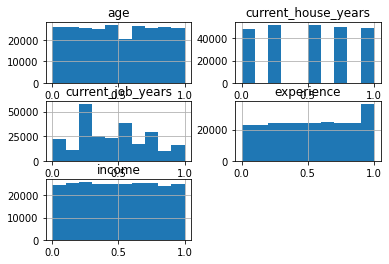

In [10]:
X.hist()
plt.show()

In [9]:
X1 = X[['income']]
X2 = X[['age']]
X3 = X[['experience']]
X4 = X[['current_job_years']]
X5 = X[['current_house_years']]

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

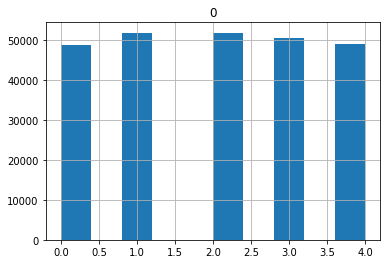

In [10]:
trans = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
data = trans.fit_transform(X5.values)
X5 = pd.DataFrame(data)
X5.hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

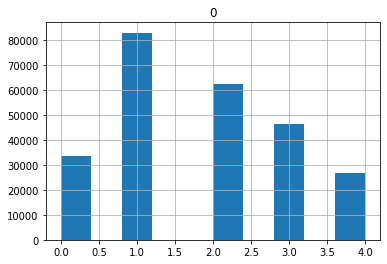

In [126]:
trans = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
data = trans.fit_transform(X4.values)
X4 = pd.DataFrame(data)
X4.hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

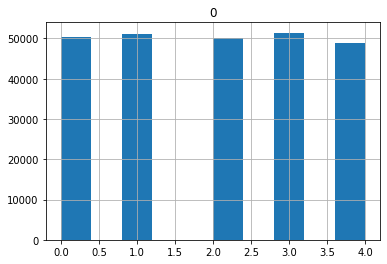

In [127]:
trans = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
data = trans.fit_transform(X1.values)
X1 = pd.DataFrame(data)
X1.hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

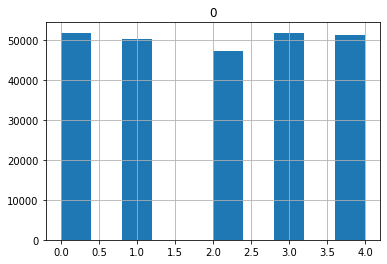

In [128]:
trans = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
data = trans.fit_transform(X2.values)
X2 = pd.DataFrame(data)
X2.hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

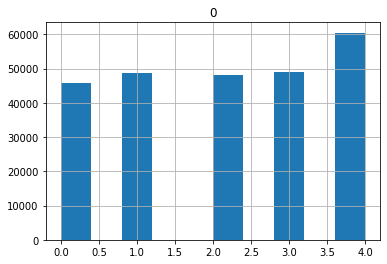

In [129]:
trans = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
data = trans.fit_transform(X3.values)
X3 = pd.DataFrame(data)
X3.hist()

In [11]:
df.drop(['current_house_years'], axis = 1,inplace = True)
df.head()

,income,age,experience,current_job_years,married_married,married_single,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented,car_ownership_no,...,state_Mizoram,state_Odisha,state_Puducherry,state_Punjab,state_Rajasthan,state_Sikkim,state_Telangana,state_Tripura,state_Uttarakhand,risk_flag
0,0.129487,0.034483,0.15,0.214286,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0.757206,0.327586,0.50,0.642857,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0.398564,0.775862,0.20,0.285714,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0.625263,0.344828,0.10,0.142857,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,0.576454,0.448276,0.55,0.214286,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [131]:
X1 = list(X1.values)
for i in range(len(X1)):
    if X1[i] == 0:
        X1[i] = 'a'
    elif X1[i] == 1:
        X1[i] = 'b'
    elif X1[i] == 2:
        X1[i] = 'c'
    elif X1[i] == 3:
        X1[i] = 'd'
    else:
        X1[i] = 'e'
X1 = pd.DataFrame(X1)
X1.head()

,0
0,a
1,d
2,b
3,d
4,c


In [132]:
X2 = list(X2.values)
for i in range(len(X2)):
    if X2[i] == 0:
        X2[i] = 'a'
    elif X2[i] == 1:
        X2[i] = 'b'
    elif X2[i] == 2:
        X2[i] = 'c'
    elif X2[i] == 3:
        X2[i] = 'd'
    else:
        X2[i] = 'e'
X2 = pd.DataFrame(X2)
X2.head()

,0
0,a
1,b
2,d
3,b
4,c


In [133]:
X3 = list(X3.values)
for i in range(len(X3)):
    if X3[i] == 0:
        X3[i] = 'a'
    elif X3[i] == 1:
        X3[i] = 'b'
    elif X3[i] == 2:
        X3[i] = 'c'
    elif X3[i] == 3:
        X3[i] = 'd'
    else:
        X3[i] = 'e'
X3 = pd.DataFrame(X3)
X3.head()

,0
0,a
1,c
2,b
3,a
4,c


In [134]:
X4 = list(X4.values)
for i in range(len(X4)):
    if X4[i] == 0:
        X4[i] = 'a'
    elif X4[i] == 1:
        X4[i] = 'b'
    elif X4[i] == 2:
        X4[i] = 'c'
    elif X4[i] == 3:
        X4[i] = 'd'
    else:
        X4[i] = 'e'
X4 = pd.DataFrame(X4)
X4.head()

,0
0,b
1,d
2,b
3,a
4,b


In [12]:
X5 = list(X5.values)
for i in range(len(X5)):
    if X5[i] == 0:
        X5[i] = 'a'
    elif X5[i] == 1:
        X5[i] = 'b'
    elif X5[i] == 2:
        X5[i] = 'c'
    elif X5[i] == 3:
        X5[i] = 'd'
    else:
        X5[i] = 'e'
X5 = pd.DataFrame(X5)
X5.head()

,0
0,d
1,d
2,a
3,c
4,e


In [136]:
X6 = pd.concat([X1,X2,X3,X4,X5], axis=1)
X6.columns = ['income','age','experience','current_job_years','current_house_years']
X6 = pd.get_dummies(X6)
X6.head()

,income_a,income_b,income_c,income_d,income_e,age_a,age_b,age_c,age_d,age_e,...,current_job_years_a,current_job_years_b,current_job_years_c,current_job_years_d,current_job_years_e,current_house_years_a,current_house_years_b,current_house_years_c,current_house_years_d,current_house_years_e
0,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [13]:
X5.columns = ['current_house_years']
X5 = pd.get_dummies(X5)
X5.head()

,current_house_years_a,current_house_years_b,current_house_years_c,current_house_years_d,current_house_years_e
0,0,0,0,1,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,0,0,1


In [14]:
df = pd.concat([X5,df],axis = 1)
df.head()

,current_house_years_a,current_house_years_b,current_house_years_c,current_house_years_d,current_house_years_e,income,age,experience,current_job_years,married_married,...,state_Mizoram,state_Odisha,state_Puducherry,state_Punjab,state_Rajasthan,state_Sikkim,state_Telangana,state_Tripura,state_Uttarakhand,risk_flag
0,0,0,0,1,0,0.129487,0.034483,0.15,0.214286,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0.757206,0.327586,0.50,0.642857,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0.398564,0.775862,0.20,0.285714,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0.625263,0.344828,0.10,0.142857,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0.576454,0.448276,0.55,0.214286,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
x = df1[['income','age','experience','current_job_years','current_house_years']]
x.head()

,income,age,experience,current_job_years,current_house_years
0,0.739054,0.655172,0.95,0.285714,0.75
1,0.120596,0.068966,0.25,0.357143,0.00
2,0.890037,0.500000,0.60,0.642857,1.00
3,0.193614,0.482759,0.45,0.214286,0.50
4,0.000312,0.068966,0.90,0.928571,0.25


/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/jaineet/opt/anac

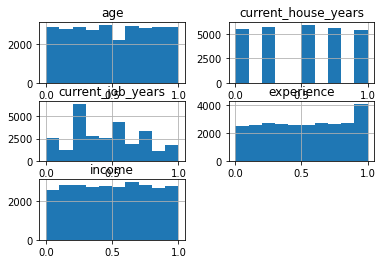

In [23]:
x.hist()
plt.show()

In [10]:
x1 = x[['income']]
x2 = x[['age']]
x3 = x[['experience']]
x4 = x[['current_job_years']]
x5 = x[['current_house_years']]

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

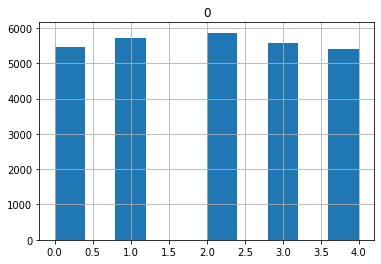

In [11]:
trans = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
data = trans.fit_transform(x5.values)
x5 = pd.DataFrame(data)
x5.hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

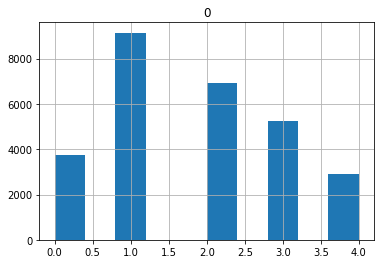

In [142]:
trans = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
data = trans.fit_transform(x4.values)
x4 = pd.DataFrame(data)
x4.hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

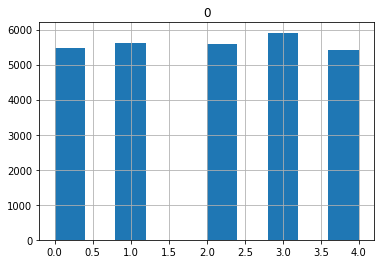

In [143]:
trans = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
data = trans.fit_transform(x1.values)
x1 = pd.DataFrame(data)
x1.hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

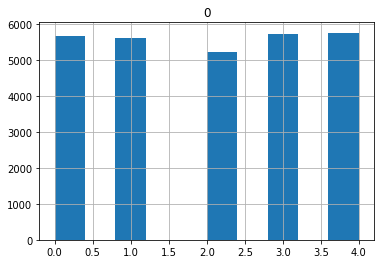

In [144]:
trans = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
data = trans.fit_transform(x2.values)
x2 = pd.DataFrame(data)
x2.hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

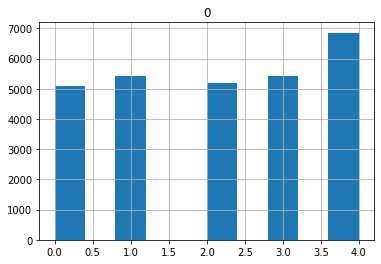

In [145]:
trans = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
data = trans.fit_transform(x3.values)
x3 = pd.DataFrame(data)
x3.hist()

In [12]:
df1.drop(['current_house_years'], axis = 1,inplace = True)
df1.head()

,income,age,experience,current_job_years,married_married,married_single,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented,car_ownership_no,...,state_Manipur,state_Mizoram,state_Odisha,state_Puducherry,state_Punjab,state_Rajasthan,state_Sikkim,state_Telangana,state_Tripura,state_Uttarakhand
0,0.739054,0.655172,0.95,0.285714,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0.120596,0.068966,0.25,0.357143,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0.890037,0.500000,0.60,0.642857,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0.193614,0.482759,0.45,0.214286,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000312,0.068966,0.90,0.928571,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
x1 = list(x1.values)
for i in range(len(x1)):
    if x1[i] == 0:
        x1[i] = 'a'
    elif x1[i] == 1:
        x1[i] = 'b'
    elif x1[i] == 2:
        x1[i] = 'c'
    elif x1[i] == 3:
        x1[i] = 'd'
    else:
        x1[i] = 'e'
x1 = pd.DataFrame(x1)
x1.head()

,0
0,d
1,a
2,e
3,a
4,a


In [148]:
x2 = list(x2.values)
for i in range(len(x2)):
    if x2[i] == 0:
        x2[i] = 'a'
    elif x2[i] == 1:
        x2[i] = 'b'
    elif x2[i] == 2:
        x2[i] = 'c'
    elif x2[i] == 3:
        x2[i] = 'd'
    else:
        x2[i] = 'e'
x2 = pd.DataFrame(x2)
x2.head()

,0
0,d
1,a
2,c
3,c
4,a


In [149]:
x3 = list(x3.values)
for i in range(len(x3)):
    if x3[i] == 0:
        x3[i] = 'a'
    elif x3[i] == 1:
        x3[i] = 'b'
    elif x3[i] == 2:
        x3[i] = 'c'
    elif x3[i] == 3:
        x3[i] = 'd'
    else:
        x3[i] = 'e'
x3 = pd.DataFrame(x3)
x3.head()

,0
0,e
1,b
2,d
3,c
4,e


In [150]:
x4 = list(x4.values)
for i in range(len(x4)):
    if x4[i] == 0:
        x4[i] = 'a'
    elif x4[i] == 1:
        x4[i] = 'b'
    elif x4[i] == 2:
        x4[i] = 'c'
    elif x4[i] == 3:
        x4[i] = 'd'
    else:
        x4[i] = 'e'
x4 = pd.DataFrame(x4)
x4.head()

,0
0,b
1,b
2,d
3,b
4,e


In [13]:
x5 = list(x5.values)
for i in range(len(x5)):
    if x5[i] == 0:
        x5[i] = 'a'
    elif x5[i] == 1:
        x5[i] = 'b'
    elif x5[i] == 2:
        x5[i] = 'c'
    elif x5[i] == 3:
        x5[i] = 'd'
    else:
        x5[i] = 'e'
x5 = pd.DataFrame(x5)
x5.head()

,0
0,d
1,a
2,e
3,c
4,b


In [152]:
x6 = pd.concat([x1,x2,x3,x4,x5], axis=1)
x6.columns = ['income','age','experience','current_job_years','current_house_years']
x6 = pd.get_dummies(x6)
x6.head()

,income_a,income_b,income_c,income_d,income_e,age_a,age_b,age_c,age_d,age_e,...,current_job_years_a,current_job_years_b,current_job_years_c,current_job_years_d,current_job_years_e,current_house_years_a,current_house_years_b,current_house_years_c,current_house_years_d,current_house_years_e
0,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [14]:
x5.columns = ['current_house_years']
x5 = pd.get_dummies(x5)
x5.head()

,current_house_years_a,current_house_years_b,current_house_years_c,current_house_years_d,current_house_years_e
0,0,0,0,1,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,1,0,0,0


In [15]:
df1 = pd.concat([x5,df1],axis = 1)
df1.head()

,current_house_years_a,current_house_years_b,current_house_years_c,current_house_years_d,current_house_years_e,income,age,experience,current_job_years,married_married,...,state_Manipur,state_Mizoram,state_Odisha,state_Puducherry,state_Punjab,state_Rajasthan,state_Sikkim,state_Telangana,state_Tripura,state_Uttarakhand
0,0,0,0,1,0,0.739054,0.655172,0.95,0.285714,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0.120596,0.068966,0.25,0.357143,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0.890037,0.500000,0.60,0.642857,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0.193614,0.482759,0.45,0.214286,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0.000312,0.068966,0.90,0.928571,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df2 = pd.read_csv("sm-dummy.csv")
df2.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,353,354,355,356,357,358,359,360,361,risk_flag
0,0,0.129487,0.034483,0.15,0.214286,0.75,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0.757206,0.327586,0.50,0.642857,0.75,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,0.398564,0.775862,0.20,0.285714,0.00,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,0.625263,0.344828,0.10,0.142857,0.50,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,4,0.576454,0.448276,0.55,0.214286,1.00,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442008 entries, 0 to 442007
Columns: 364 entries, Unnamed: 0 to risk_flag
dtypes: float64(362), int64(2)
memory usage: 1.2 GB


In [18]:
y2 = df2[['risk_flag']].values
df2.drop(['risk_flag'], axis = 1,inplace = True)
df2.drop(['Unnamed: 0'], axis = 1,inplace = True)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,352,353,354,355,356,357,358,359,360,361
0,0.129487,0.034483,0.15,0.214286,0.75,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.757206,0.327586,0.50,0.642857,0.75,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.398564,0.775862,0.20,0.285714,0.00,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.625263,0.344828,0.10,0.142857,0.50,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.576454,0.448276,0.55,0.214286,1.00,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
h = df2[['4']]
h.head()

,4
0,0.75
1,0.75
2,0.00
3,0.50
4,1.00


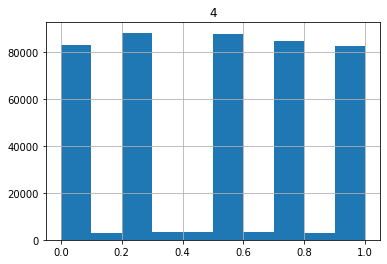

In [18]:
h.hist()
plt.show()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

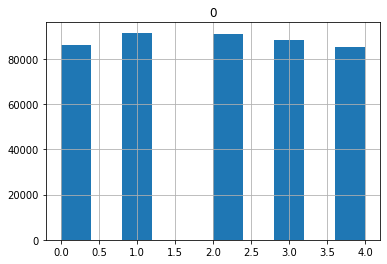

In [20]:
trans = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
data = trans.fit_transform(h.values)
h = pd.DataFrame(data)
h.hist()

In [21]:
h = list(h.values)
for i in range(len(h)):
    if h[i] == 0:
        h[i] = 'a'
    elif h[i] == 1:
        h[i] = 'b'
    elif h[i] == 2:
        h[i] = 'c'
    elif h[i] == 3:
        h[i] = 'd'
    else:
        h[i] = 'e'
h = pd.DataFrame(h)
h.head()

,0
0,d
1,d
2,a
3,c
4,e


In [22]:
#h.columns = ['current_house_years']
h = pd.get_dummies(h)
h.head()

,0_a,0_b,0_c,0_d,0_e
0,0,0,0,1,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,0,0,1


In [23]:
df2.drop(['4'], axis = 1,inplace = True)
df2.head()

,0,1,2,3,5,6,7,8,9,10,...,352,353,354,355,356,357,358,359,360,361
0,0.129487,0.034483,0.15,0.214286,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.757206,0.327586,0.50,0.642857,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.398564,0.775862,0.20,0.285714,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.625263,0.344828,0.10,0.142857,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.576454,0.448276,0.55,0.214286,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df2 = pd.concat([h,df2],axis = 1)
df2.head()

,0_a,0_b,0_c,0_d,0_e,0,1,2,3,5,...,352,353,354,355,356,357,358,359,360,361
0,0,0,0,1,0,0.129487,0.034483,0.15,0.214286,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,1,0,0.757206,0.327586,0.50,0.642857,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0.398564,0.775862,0.20,0.285714,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1,0,0,0.625263,0.344828,0.10,0.142857,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,1,0.576454,0.448276,0.55,0.214286,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df3 = pd.read_csv("ros-dummy.csv")
df3.head()

Text(0, 0.5, 'explained_variance_ratio_')

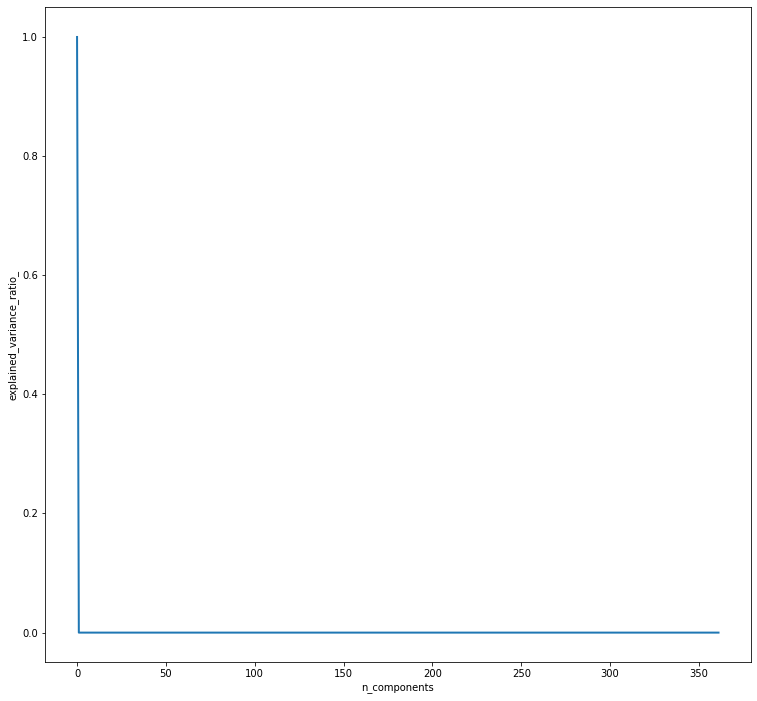

In [28]:
pca = PCA()
pca.fit(df.values)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

Text(0, 0.5, 'explained_variance_ratio_')

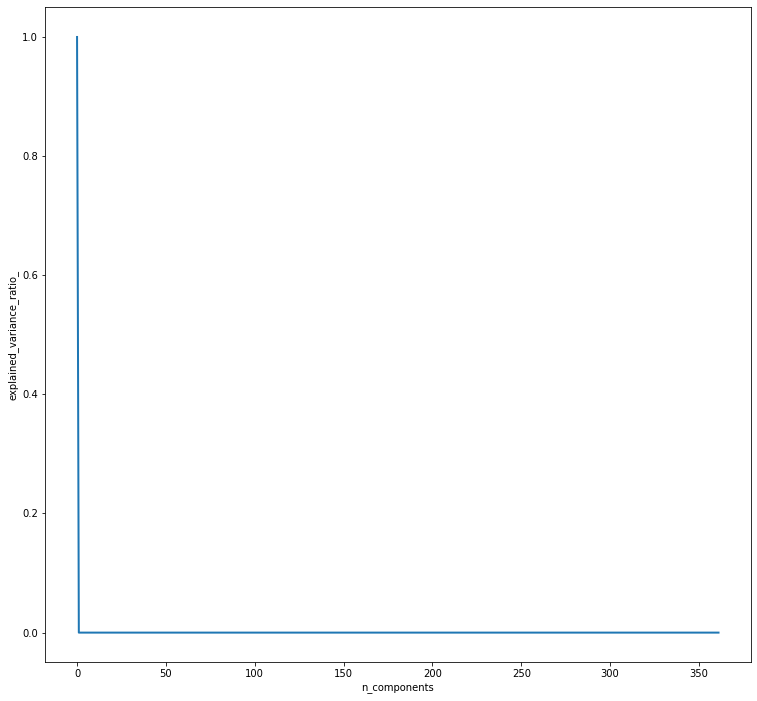

In [29]:
pca = PCA()
pca.fit(df1.values)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [36]:
pca = PCA()
pc = pca.fit_transform(df.values)
printpc = pd.DataFrame(data = pc)
printpc.rename(columns={0:'f1'}, inplace=True)
printpc.head()

,f1,1,2,3,4,5,6,7,8,9,...,352,353,354,355,356,357,358,359,360,361
0,-3.693282e+06,-26.968745,-7.772203,-0.069909,-0.983115,-0.406237,-0.138707,-0.089764,-0.062059,-0.079270,...,-1.663494e-09,-4.862160e-09,4.477167e-16,7.748968e-16,-1.870752e-16,1.596043e-16,-3.043984e-17,-1.128539e-17,-3.874906e-18,3.110685e-18
1,2.577399e+06,-9.944648,1.036338,-2.431849,-1.004508,-0.428927,-0.152416,-0.155847,0.898598,0.182186,...,3.616922e-10,4.998709e-11,2.228964e-15,1.058922e-15,3.437674e-16,4.166688e-17,-8.789069e-16,-2.439785e-16,3.892538e-17,1.268329e-16
2,-1.005302e+06,16.046853,-6.485390,-0.535733,1.938350,-0.425302,1.275139,-0.027887,-0.065776,-0.103035,...,-1.545167e-09,-9.324187e-09,-1.917331e-17,-4.816927e-16,1.624365e-16,-1.510339e-16,6.495356e-16,-2.971316e-17,3.067967e-18,-1.622420e-17
3,1.259334e+06,-8.947516,-9.183808,0.411138,-0.020432,0.995728,-0.129940,-0.092507,-0.086714,-0.095887,...,-1.355117e-09,-2.304555e-09,9.458181e-16,-9.469565e-16,-5.735837e-17,1.508611e-17,-7.020047e-16,4.472940e-17,5.235409e-17,7.406434e-17
4,7.717543e+05,-2.956585,-0.620825,3.422414,-1.966067,-0.418243,-0.144408,-0.104066,-0.056520,-0.078514,...,1.075286e-09,1.698228e-09,-4.243734e-16,-2.879235e-16,4.402012e-16,-2.126284e-16,-8.304641e-17,1.768818e-16,7.502772e-17,1.182357e-16


In [34]:
pca1 = PCA()
pc1 = pca1.fit_transform(df1.values)
printpc1 = pd.DataFrame(data = pc1)
printpc1.rename(columns={0:'f1'}, inplace=True)
printpc1.head()

,f1,1,2,3,4,5,6,7,8,9,...,352,353,354,355,356,357,358,359,360,361
0,-2.363527e+06,-8.991100,6.934611,5.966805,-0.969110,-0.430275,-0.150807,-0.093618,-0.049213,-0.088063,...,1.411601e-10,-2.690387e-10,2.077537e-13,1.607802e-13,-5.720029e-17,-4.471020e-17,-4.475342e-17,-2.020299e-17,1.958309e-18,5.963089e-18
1,3.814559e+06,25.108721,-5.065534,-1.041127,2.034371,-0.403307,-0.163410,-0.134754,0.871088,0.240539,...,3.548313e-10,-6.863439e-10,7.911004e-13,3.638005e-13,-4.037198e-16,-2.972514e-16,-1.090897e-16,6.126233e-17,-4.119932e-18,-4.315330e-18
2,-3.871779e+06,0.008059,2.797828,-1.560018,-2.017919,-0.410963,-0.150400,-0.143756,0.888865,0.240370,...,-1.100276e-10,1.385916e-09,6.421946e-13,1.044739e-13,-1.399526e-17,1.274953e-16,-2.051785e-17,7.570545e-17,8.270668e-18,-5.322262e-18
3,3.085142e+06,1.095993,-2.406014,2.515506,0.018787,0.988926,1.249142,-0.101030,0.906718,0.249620,...,-5.599267e-10,-8.732068e-10,-1.347307e-13,1.014533e-13,-5.435178e-16,-2.638544e-16,1.019416e-16,-3.988829e-17,1.262246e-17,2.564428e-18
4,5.016134e+06,25.071944,10.136935,-2.627168,1.084498,0.995596,-0.136107,-0.095099,-0.073806,-0.112588,...,-3.420772e-10,3.104366e-10,-1.314925e-12,-1.735863e-13,1.439920e-16,8.327535e-17,2.023150e-17,-3.040587e-17,8.604643e-18,1.219125e-17


In [49]:
printpc.dropna(inplace = True)
printpc.head()

,f1,1,2,3,4,5,6,7,8,9,...,352,353,354,355,356,357,358,359,360,361
0,-3.693282e+06,-26.968745,-7.772203,-0.069909,-0.983115,-0.406237,-0.138707,-0.089764,-0.062059,-0.079270,...,-1.663494e-09,-4.862160e-09,4.477167e-16,7.748968e-16,-1.870752e-16,1.596043e-16,-3.043984e-17,-1.128539e-17,-3.874906e-18,3.110685e-18
1,2.577399e+06,-9.944648,1.036338,-2.431849,-1.004508,-0.428927,-0.152416,-0.155847,0.898598,0.182186,...,3.616922e-10,4.998709e-11,2.228964e-15,1.058922e-15,3.437674e-16,4.166688e-17,-8.789069e-16,-2.439785e-16,3.892538e-17,1.268329e-16
2,-1.005302e+06,16.046853,-6.485390,-0.535733,1.938350,-0.425302,1.275139,-0.027887,-0.065776,-0.103035,...,-1.545167e-09,-9.324187e-09,-1.917331e-17,-4.816927e-16,1.624365e-16,-1.510339e-16,6.495356e-16,-2.971316e-17,3.067967e-18,-1.622420e-17
3,1.259334e+06,-8.947516,-9.183808,0.411138,-0.020432,0.995728,-0.129940,-0.092507,-0.086714,-0.095887,...,-1.355117e-09,-2.304555e-09,9.458181e-16,-9.469565e-16,-5.735837e-17,1.508611e-17,-7.020047e-16,4.472940e-17,5.235409e-17,7.406434e-17
4,7.717543e+05,-2.956585,-0.620825,3.422414,-1.966067,-0.418243,-0.144408,-0.104066,-0.056520,-0.078514,...,1.075286e-09,1.698228e-09,-4.243734e-16,-2.879235e-16,4.402012e-16,-2.126284e-16,-8.304641e-17,1.768818e-16,7.502772e-17,1.182357e-16


In [50]:
df = preprocessing.MinMaxScaler().fit(printpc[['f1']]).transform(printpc[['f1']].astype(float))
X[0:5]

array([[0.1294868 ],
       [0.75720597],
       [0.39856389],
       [0.62526262],
       [0.576454  ]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df2.values, y2, test_size=0.04, random_state=1)
y_test = y_test.reshape(y_test.shape[0])
y_test.shape

(17681,)

In [26]:
y_test = y_test.reshape(y_test.shape[0])
y_test = pd.Series(y_test)
y_test.value_counts()

1    8866
0    8815
dtype: int64

In [62]:
X = pd.DataFrame(df.values)
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(25,'Score'))  

     Specs         Score
0        0  3.992087e+06
2        2  1.073079e+03
1        1  6.986581e+02
93      93  2.323312e+02
3        3  1.518872e+02
195    195  1.502381e+02
8        8  1.320202e+02
150    150  1.280200e+02
104    104  1.074404e+02
72      72  1.071000e+02
350    350  1.046459e+02
11      11  1.016771e+02
5        5  1.006588e+02
291    291  1.004773e+02
298    298  9.897608e+01
271    271  9.042249e+01
81      81  8.779821e+01
190    190  7.937528e+01
201    201  7.888458e+01
116    116  7.560488e+01
163    163  6.741154e+01
352    352  6.741154e+01
236    236  6.521651e+01
139    139  6.398141e+01
74      74  6.228152e+01


In [142]:
model = tf.keras.Sequential([
    #tf.keras.layers.Flatten(input_shape=(366,)),
    #tf.keras.layers.Dense(13,activation = 'relu',kernel_regularizer=l2(0.00001)),
    #tf.keras.layers.Dense(40,activation = 'relu',kernel_regularizer=l2(0.0001)),
    tf.keras.layers.Dropout(0.2, input_shape=(366,)),
    tf.keras.layers.Dense(366,activation = 'relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(96,activation = 'relu',kernel_constraint=maxnorm(5)),
    #tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.Dense(16,activation = 'relu'),
    #tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.Dense(4,activation = 'relu'),
    #tf.keras.layers.Dense(13,activation = 'relu',kernel_regularizer=l2(0.00001)),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
                         ])

In [143]:
sgd = SGD(lr=0.1, momentum=0.9)
model.compile(optimizer = sgd, 
              loss = 'binary_crossentropy',
              metrics = ['AUC'])

In [144]:
#weights = {0:1, 1:7.11}
model.fit(X_train,y_train,epochs = 10)

Epoch 1/10
13261/13261 [==============================] - 17s 1ms/step - loss: 0.6298 - auc: 0.6894
Epoch 2/10
13261/13261 [==============================] - 17s 1ms/step - loss: 0.5308 - auc: 0.8103
Epoch 3/10
13261/13261 [==============================] - 17s 1ms/step - loss: 0.4895 - auc: 0.8429
Epoch 4/10
13261/13261 [==============================] - 17s 1ms/step - loss: 0.4660 - auc: 0.8588
Epoch 5/10
13261/13261 [==============================] - 17s 1ms/step - loss: 0.4526 - auc: 0.8670
Epoch 6/10
13261/13261 [==============================] - 18s 1ms/step - loss: 0.4400 - auc: 0.8746
Epoch 7/10
13261/13261 [==============================] - 18s 1ms/step - loss: 0.4306 - auc: 0.8795
Epoch 8/10
13261/13261 [==============================] - 17s 1ms/step - loss: 0.4252 - auc: 0.8828
Epoch 9/10
13261/13261 [==============================] - 17s 1ms/step - loss: 0.4174 - auc: 0.8865
Epoch 10/10
13261/13261 [==============================] - 17s 1ms/step - loss: 0.4140 - auc: 0.8886

In [145]:
loss,acc = model.evaluate(X_test,y_test,verbose= 1)
print(acc)

553/553 [==============================] - 0s 854us/step - loss: 0.4453 - auc: 0.9117
0.9117361307144165


In [146]:
Pred = model.predict(df1.values) 
Pred = pd.DataFrame(Pred)
Pred.describe()

,0
count,28000.000000
mean,0.466026
std,0.294834
min,0.000032
25%,0.203305
50%,0.442234
75%,0.734040
max,0.996634


In [147]:
pred1 = model.predict(df1.values) 
for i in range(len(pred1)):
    if pred1[i] > 0.5:
        pred1[i] = int(1)
    else:
        pred1[i] = int(0)
pred1 = pred1.reshape(pred1.shape[0])
pred1 = pd.Series(pred1)
pred1.value_counts()


0.0    15517
1.0    12483
dtype: int64

In [51]:
df4 = pd.DataFrame(pred1)
df4 = df4.apply(np.int64)
#df4.head()
#df2 = pd.concat([df1['id'],df2], axis=1)
#df2.columns = ['id','risk_flag']
df4.to_csv('ann-sm-dummy-33.csv')

In [50]:
fd = pd.read_csv("ann-sm-dummy-32.csv")
fd = fd.iloc[:, 1]
fd.value_counts()

0    16506
1    11494
Name: 0, dtype: int64

In [121]:
tuner = Hyperband(
    model,
    max_epochs=10,
    objective='AUC',
    seed=2,
    executions_per_trial=2,
    directory='hyperband',
    project_name='cifar10'
)

Traceback (most recent call last):
  File "/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/kerastuner/engine/hypermodel.py", line 104, in build
    model = self.hypermodel.build(hp)
  File "/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py", line 985, in __call__
    outputs = call_fn(inputs, *args, **kwargs)
  File "/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py", line 372, in call
    return super(Sequential, self).call(inputs, training=training, mask=mask)
  File "/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py", line 386, in call
    inputs, training=training, mask=mask)
  File "/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py", line 508, in _run_internal_graph
    outputs = node.layer(*args, **kwargs)
  File "/Users/jaineet/opt/anaconda3/lib/python3.7/site-packa

Invalid model 0/5
Invalid model 1/5


Traceback (most recent call last):
  File "/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/kerastuner/engine/hypermodel.py", line 104, in build
    model = self.hypermodel.build(hp)
  File "/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py", line 985, in __call__
    outputs = call_fn(inputs, *args, **kwargs)
  File "/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py", line 372, in call
    return super(Sequential, self).call(inputs, training=training, mask=mask)
  File "/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py", line 386, in call
    inputs, training=training, mask=mask)
  File "/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py", line 508, in _run_internal_graph
    outputs = node.layer(*args, **kwargs)
  File "/Users/jaineet/opt/anaconda3/lib/python3.7/site-packa

Invalid model 2/5
Invalid model 3/5
Invalid model 4/5
Invalid model 5/5


Traceback (most recent call last):
  File "/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/kerastuner/engine/hypermodel.py", line 104, in build
    model = self.hypermodel.build(hp)
  File "/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py", line 985, in __call__
    outputs = call_fn(inputs, *args, **kwargs)
  File "/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py", line 372, in call
    return super(Sequential, self).call(inputs, training=training, mask=mask)
  File "/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py", line 386, in call
    inputs, training=training, mask=mask)
  File "/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py", line 508, in _run_internal_graph
    outputs = node.layer(*args, **kwargs)
  File "/Users/jaineet/opt/anaconda3/lib/python3.7/site-packa

RuntimeError: Too many failed attempts to build model.

In [24]:
LR = LogisticRegression(C=0.01, solver='liblinear',class_weight = 'balanced').fit(X_train,y_train)
pred5 = LR.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred5, normalize = True))
print(metrics.classification_report(y_test,pred5))
print("\tConfusion Matrix")
print(metrics.confusion_matrix(y_test,pred5))
auc = roc_auc_score(y_test, pred5)
print('ROC AUC: %f' % auc)

/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.5790674603174604
              precision    recall  f1-score   support

           0       0.91      0.58      0.71      8903
           1       0.15      0.58      0.24      1177

    accuracy                           0.58     10080
   macro avg       0.53      0.58      0.48     10080
weighted avg       0.82      0.58      0.65     10080

	Confusion Matrix
[[5153 3750]
 [ 493  684]]
ROC AUC: 0.579966


In [20]:
clf = neighbors.KNeighborsClassifier()
para_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],'weights':['uniform','distance']}
clf_g = GridSearchCV(clf,para_grid,cv=3,n_jobs=12)
clf_g.fit(X_train,y_train)
print(clf_g.best_params_)
pred3 = clf_g.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred3, normalize = True))
print(metrics.classification_report(y_test,pred3))
print("\tConfusion Matrix")
print(metrics.confusion_matrix(y_test,pred3))
auc = roc_auc_score(y_test, pred3)
print('ROC AUC: %f' % auc)

KeyboardInterrupt: 

In [59]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    #'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 12,
    cv = 3,
    verbose=True,
)
grid_search.fit(X_train, y_train)
pred7 = grid_search.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred7, normalize = True))
print(metrics.classification_report(y_test,pred7))
print("\tConfusion Matrix")
print(metrics.confusion_matrix(y_test,pred7))
auc = roc_auc_score(y_test, pred7)
print('ROC AUC: %f' % auc)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[22:42:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8891865079365079
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8903
           1       0.60      0.15      0.24      1177

    accuracy                           0.89     10080
   macro avg       0.75      0.57      0.59     10080
weighted avg       0.86      0.89      0.86     10080

	Confusion Matrix
[[8783  120]
 [ 997  180]]
ROC AUC: 0.569726


In [ ]:
clf = Pipeline([('clf', DecisionTreeClassifier(random_state=101))])  

criterion = ['gini', 'entropy']
splitter = ['best']
max_depth = [8, 9, 10, 11] 
min_samples_leaf = [2, 3, 5]
class_weight = ['balanced', None] 

param_grid = [{ 'clf__class_weight': class_weight
                ,'clf__criterion': criterion
                ,'clf__splitter': splitter
                ,'clf__max_depth': max_depth
                ,'clf__min_samples_leaf': min_samples_leaf
            }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1,n_jobs=-1)

gs.fit(X_train,y_train)

pred2 = gs.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred2, normalize = True))
print(metrics.classification_report(y_test,pred2))
print("\tConfusion Matrix")
print(metrics.confusion_matrix(y_test,pred2))
auc = roc_auc_score(y_test, pred2)
print('ROC AUC: %f' % auc)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [116]:
pip install keras-tuner

     |████████████████████████████████| 62 kB 206 kB/s eta 0:00:011
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-py3-none-any.whl size=78936 sha256=6c797c080f782f4132c7a518356bc2b425d44d37236825b30eebedddfa040368
  Stored in directory: /Users/jaineet/Library/Caches/pip/wheels/78/e2/80/7fe373cad54ad22b06d0d6204cbc29cead9e69bb2680327775
  Created wheel for terminaltables: filename=terminaltables-3.1.0-py3-none-any.whl size=15354 sha256=6261d7f3a18b55e0ecadb5bdf3c7fc65c21888329b05ea11cda2fae80d772152
  Stored in directory: /Users/jaineet/Library/Caches/pip/wheels/ba/ad/c8/2d98360791161cd3db6daf6b5e730f34021fc9367d5879f497
Successfully built keras-tuner terminaltables
Note: you may need to restart the kernel to use updated packages.
